In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
#import warnings
#import os
#print(os.listdir("../input"))
#import warnings
#warnings.filterwarnings('ignore')


In [84]:
#data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', dtype='unicode')
data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', encoding = 'ISO-8859-1')

In [85]:
data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46647,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Zverev A.,...,NaN,NaN,1.57,2.38,NaN,NaN,1.66,2.45,1.60,2.30
46648,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Wawrinka S.,...,NaN,NaN,1.22,4.33,NaN,NaN,1.24,4.91,1.21,4.34
46649,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Zverev A.,...,NaN,NaN,2.38,1.57,NaN,NaN,3.12,1.57,2.68,1.46
46650,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Wawrinka S.,...,NaN,NaN,1.33,3.40,NaN,NaN,1.41,3.80,1.31,3.40


In [86]:
data.Series.unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'International Series', 'ATP250', 'ATP500',
       'Masters 1000'], dtype=object)

In [87]:
# Evolution rank of Federer, Nadal and Djokovic

In [88]:
top3 = data[(data.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])) | (data.Loser.isin(['Federer R.', 'Nadal R.', 'Djokovic N.']))]
top3 = top3[['Date', 'Winner', 'Loser', 'WRank', 'LRank']]

In [89]:
top3_w = top3[top3.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]
top3_l = top3[top3.Loser.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]

top3_w = top3_w[['Date', 'Winner', 'WRank']]
top3_l = top3_l[['Date', 'Loser', 'LRank']]

In [90]:
top3_w.columns = ['Date','Player','Rank']
top3_l.columns = ['Date','Player', 'Rank']

In [91]:
top3 = pd.concat([top3_w, top3_l], sort=False)
top3['Date'] = pd.to_datetime(top3.Date, format='%d/%m/%Y')
top3 = top3.sort_values(['Date'])

In [92]:
top3.Rank = top3.Rank.astype(int)

# Remove outline Ranks
top3 = top3[top3.Rank < 100]

In [93]:
federer = top3[top3.Player == 'Federer R.']
nadal = top3[top3.Player == 'Nadal R.']
djokovic = top3[top3.Player == 'Djokovic N.']

Text(0.5, 0.98, 'Rank Evolution for the Big 3')

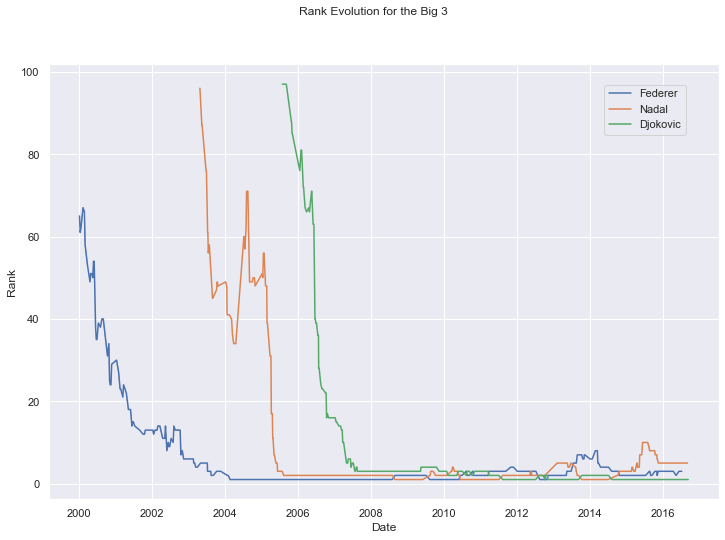

In [94]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Rank', data=federer)
sns.lineplot(x='Date', y='Rank', data=nadal)
sns.lineplot(x='Date', y='Rank', data=djokovic)
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
fig.suptitle('Rank Evolution for the Big 3')

Text(0.5, 0.98, 'Rank Evolution for the Big 3 in the top 10')

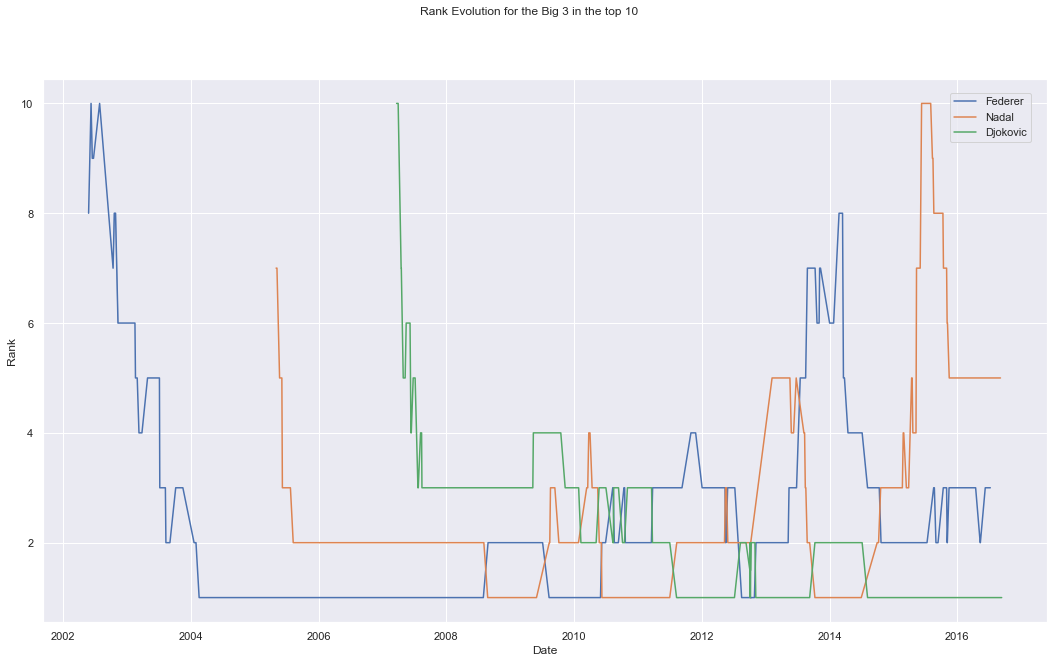

In [95]:
# Let's zoom on the top 10 
fig = plt.figure(figsize=(18,10))
sns.lineplot(x='Date', y='Rank', data=federer[federer.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=nadal[nadal.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=djokovic[djokovic.Rank <=10])
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
fig.suptitle('Rank Evolution for the Big 3 in the top 10')

In [96]:
# Grand Slams titles for the Big 3

In [97]:
slams = data[['Date','Tournament','Series', 'Round', 'Winner']]

In [98]:
slams = slams[(slams.Series == 'Grand Slam') & (slams.Round == 'The Final')]

In [99]:
slams = slams[slams.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]

In [100]:
slams.head()

,Date,Tournament,Series,Round,Winner
10423,6/07/2003,Wimbledon,Grand Slam,The Final,Federer R.
11922,31/01/2004,Australian Open,Grand Slam,The Final,Federer R.
13285,4/07/2004,Wimbledon,Grand Slam,The Final,Federer R.
13958,12/09/2004,US Open,Grand Slam,The Final,Federer R.
15918,5/06/2005,French Open,Grand Slam,The Final,Nadal R.


In [101]:
slams['Titles'] = slams.groupby('Winner').cumcount().astype(int) + 1
slams['Date'] = pd.to_datetime(slams.Date, format='%d/%m/%Y')
slams = slams.sort_values(['Date'])
slams.head()

,Date,Tournament,Series,Round,Winner,Titles
10423,2003-07-06,Wimbledon,Grand Slam,The Final,Federer R.,1
11922,2004-01-31,Australian Open,Grand Slam,The Final,Federer R.,2
13285,2004-07-04,Wimbledon,Grand Slam,The Final,Federer R.,3
13958,2004-09-12,US Open,Grand Slam,The Final,Federer R.,4
15918,2005-06-05,French Open,Grand Slam,The Final,Nadal R.,1


In [102]:
federer_slams = slams[slams.Winner == 'Federer R.']
nadal_slams = slams[slams.Winner == 'Nadal R.']
djokovic_slams = slams[slams.Winner == 'Djokovic N.']

Text(0.5, 0.98, 'Slams Evolution for the Big 3')

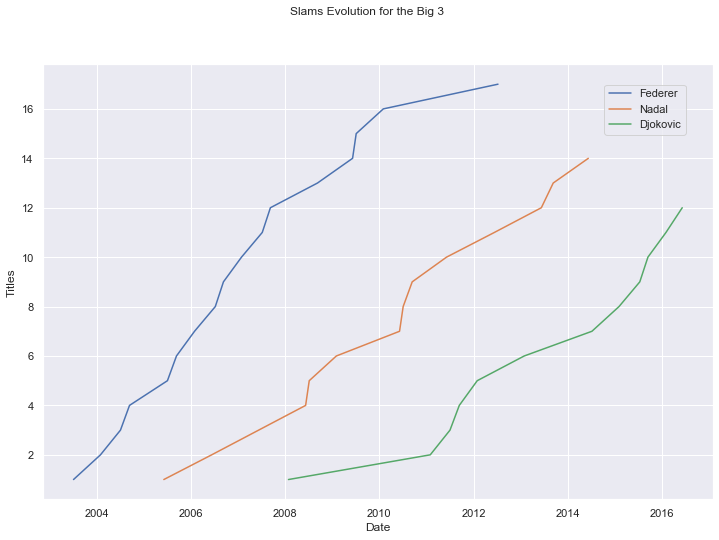

In [103]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Titles', data=federer_slams)
sns.lineplot(x='Date', y='Titles', data=nadal_slams)
sns.lineplot(x='Date', y='Titles', data=djokovic_slams)
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
fig.suptitle('Slams Evolution for the Big 3')

In [104]:
# Grand Slams Wins per Rank

In [105]:
slams_winners = data[['Series', 'Round', 'WRank']]

In [106]:
slams_winners = slams_winners[(slams_winners.Series == 'Grand Slam') & (slams_winners.Round == 'The Final')]

In [107]:
slams_winners.WRank = slams_winners.WRank.astype(int)

In [108]:
slams_winners

,Series,Round,WRank
281,Grand Slam,The Final,1
1415,Grand Slam,The Final,5
1690,Grand Slam,The Final,3
2395,Grand Slam,The Final,7
3244,Grand Slam,The Final,6
...,...,...,...
43971,Grand Slam,The Final,1
44667,Grand Slam,The Final,1
45756,Grand Slam,The Final,1
46046,Grand Slam,The Final,2


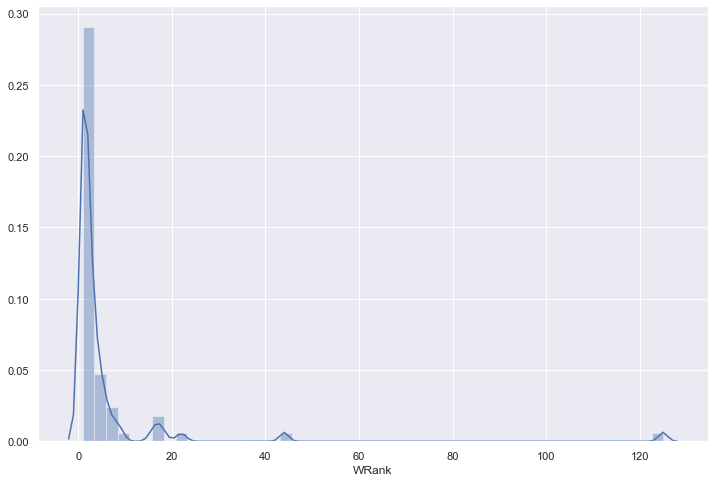

In [109]:
fig = plt.figure(figsize=(12,8))
sns.distplot(slams_winners.WRank)

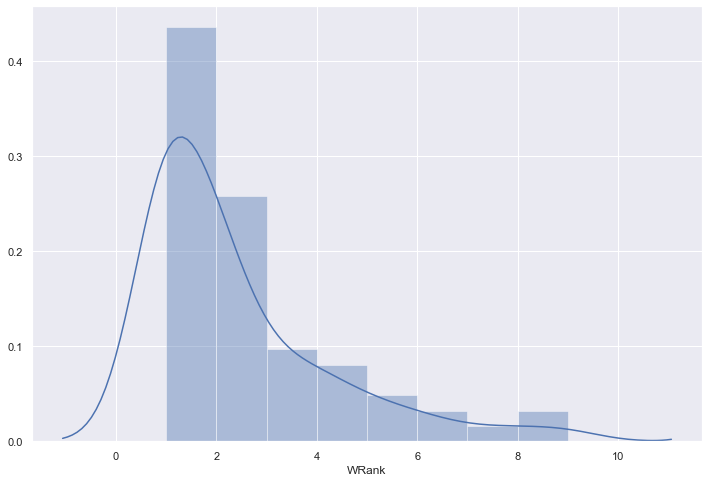

In [110]:
# Very rare after the 20th place
fig = plt.figure(figsize=(12,8))
sns.distplot(slams_winners.WRank[slams_winners.WRank <=10])

In [111]:
rank_prob_win = round(slams_winners.groupby('WRank')['Series'].count()/len(slams_winners),4)*100

In [112]:
top3_prob_win = rank_prob_win[1] + rank_prob_win[2] + rank_prob_win[3]
print("You have %s%% chances to win a Grand Slam if you are in the top 3" %top3_prob_win)

You have 72.06% chances to win a Grand Slam if you are in the top 3


In [113]:
num1 = data[['Winner', 'Loser', 'WRank', 'LRank']]
num1 = num1[(num1.WRank != 'NR') & (num1.LRank != 'NR')]
num1 = num1.dropna()
num1['WRank'] = num1['WRank'].astype(int)
num1['LRank'] = num1['LRank'].astype(int)
num1 = num1[(num1.WRank == 1) | (num1.LRank == 1)]

In [114]:
num1_w = num1[num1.WRank == 1]['Winner']
num1_l = num1[num1.LRank == 1]['Loser']
num1_w.columns = ['Player']
num1_l.columns = ['Player']
num1 = pd.concat([num1_w, num1_l], sort=False)

num1 = num1.drop_duplicates()
print('Since 2000, there were %s Number 1 players' % num1.count())

Since 2000, there were 11 Number 1 players


In [115]:
# Upset in Grand Slam

In [116]:
slams = data[data.Series == 'Grand Slam']

In [117]:
slams

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
155,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Agassi A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Alami K.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Arazi H.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Behrend T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Bjorkman J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46593,52,New York,US Open,7/09/2016,Grand Slam,Outdoor,Hard,Quarterfinals,5,Nishikori K.,...,NaN,NaN,5.50,1.14,NaN,NaN,6.18,1.17,5.45,1.15
46594,52,New York,US Open,8/09/2016,Grand Slam,Outdoor,Hard,Quarterfinals,5,Wawrinka S.,...,NaN,NaN,2.38,1.57,NaN,NaN,2.50,1.70,2.34,1.60
46595,52,New York,US Open,9/09/2016,Grand Slam,Outdoor,Hard,Semifinals,5,Djokovic N.,...,NaN,NaN,1.12,6.00,NaN,NaN,1.18,6.09,1.15,5.57
46596,52,New York,US Open,9/09/2016,Grand Slam,Outdoor,Hard,Semifinals,5,Wawrinka S.,...,NaN,NaN,2.10,1.73,NaN,NaN,2.27,1.78,2.12,1.72


In [118]:
upset = slams[['Tournament', 'Series', 'Round', 'AvgW', 'AvgL']]

In [119]:
upset = upset.dropna()

In [120]:
upset.head()

,Tournament,Series,Round,AvgW,AvgL
29798,French Open,Grand Slam,1st Round,1.24,3.88
29799,French Open,Grand Slam,1st Round,1.06,8.62
29800,French Open,Grand Slam,1st Round,1.73,2.05
29801,French Open,Grand Slam,1st Round,1.04,9.83
29802,French Open,Grand Slam,1st Round,1.79,1.98


In [121]:
round(upset.groupby('Tournament')['AvgW'].mean(),3)

Tournament
Australian Open    1.679
French Open        1.695
US Open            1.784
Wimbledon          1.787
Name: AvgW, dtype: float64

In [122]:
# Wimbledon is the Grand Slam with the best upsets

In [123]:
round(upset.groupby('Round')['AvgW'].mean(),3)

Round
1st Round        1.750
2nd Round        1.724
3rd Round        1.742
4th Round        1.672
Quarterfinals    1.733
Semifinals       1.636
The Final        2.161
Name: AvgW, dtype: float64

In [124]:
# There are more upset in Finals

In [125]:
# Set losed per Grand Slams

In [126]:
sets = slams[['Tournament', 'Series', 'Round', 'Wsets', 'Lsets']]
sets = sets.dropna()


In [127]:
round(sets.groupby('Tournament')['Lsets'].mean(),3)

Tournament
Australian Open    0.685
French Open        0.663
US Open            0.679
Wimbledon          0.688
Name: Lsets, dtype: float64

In [128]:
# French Open is the tournament where player lose the less sets

In [129]:
round(sets.groupby(['Round'])['Lsets'].mean(),3)

Round
1st Round        0.674
2nd Round        0.686
3rd Round        0.655
4th Round        0.691
Quarterfinals    0.705
Semifinals       0.750
The Final        0.776
Name: Lsets, dtype: float64

In [130]:
# As expected, players lose more sets when they advanced in the tournament (the players have a better level)

In [131]:
# Grand Slam wins during period

In [132]:
wins = slams[['Tournament', 'Round', 'Winner']]
wins = wins[wins.Round == 'The Final']

In [133]:
wins.head()

,Tournament,Round,Winner
281,Australian Open,The Final,Agassi A.
1415,French Open,The Final,Kuerten G.
1690,Wimbledon,The Final,Sampras P.
2395,US Open,The Final,Safin M.
3244,Australian Open,The Final,Agassi A.


In [134]:
winners = wins.groupby('Winner')['Tournament'].count()

In [135]:
winners = winners.reset_index()

In [136]:
winners = winners.sort_values(['Tournament'], ascending=False)
winners

,Winner,Tournament
5,Federer R.,17
13,Nadal R.,14
4,Djokovic N.,12
0,Agassi A.,3
12,Murray A.,3
17,Wawrinka S.,3
8,Hewitt L.,2
11,Kuerten G.,2
15,Safin M.,2
16,Sampras P.,2


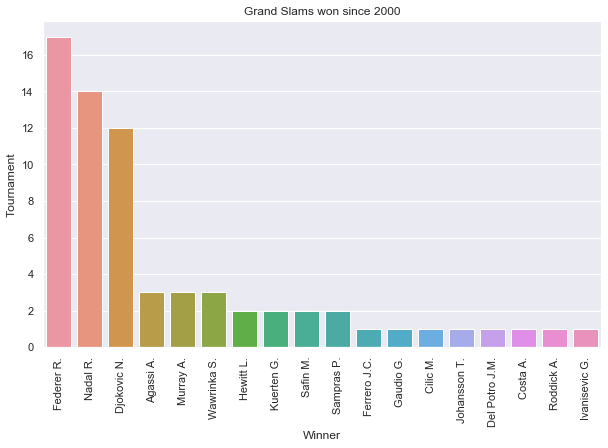

In [137]:
sns.set(rc={'figure.figsize':(10,6)})

g = sns.barplot(x=winners.Winner, y=winners.Tournament)
g.set_xticklabels(labels = winners.Winner,  rotation=90)
plt.title('Grand Slams won since 2000')
plt.show()

In [138]:
winners_slam = wins.groupby(['Winner', 'Tournament']).count()
winners_slam = winners_slam.reset_index()
# winners_slam = winners_slam.sort_values(['Winner'], ascending=False)
winners_slam.columns = ['Winner','Tournament', 'Count']
winners_slam

,Winner,Tournament,Count
0,Agassi A.,Australian Open,3
1,Cilic M.,US Open,1
2,Costa A.,French Open,1
3,Del Potro J.M.,US Open,1
4,Djokovic N.,Australian Open,6
5,Djokovic N.,French Open,1
6,Djokovic N.,US Open,2
7,Djokovic N.,Wimbledon,3
8,Federer R.,Australian Open,4
9,Federer R.,French Open,1


In [139]:
winners_slam = winners_slam.dropna()

<Figure size 720x576 with 0 Axes>

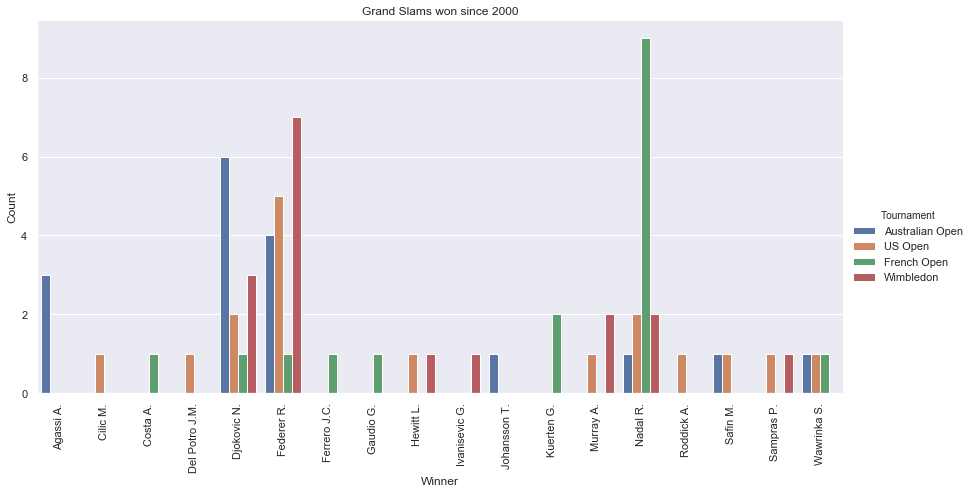

In [140]:
fig = plt.figure(figsize=(10,8))

g = sns.catplot(x="Winner", y="Count", hue = "Tournament", data=winners_slam, kind="bar", size=6, aspect=2)
g.set_xticklabels(labels = winners_slam.Winner.unique(),  rotation=90)
plt.title('Grand Slams won since 2000')
plt.show()

In [141]:
# Best players on surface

In [142]:
# df with column names
surface = data[['Surface', 'Winner', 'Loser']]

In [143]:
surface.shape

(46652, 3)

In [144]:
# create 2 df for winner and looser and change the column names to player
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [145]:
# add 1 more column to the df and fill with sequential nums from 1 to length of df
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [146]:

surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']

surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [147]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [148]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [149]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [150]:
surface = surface[surface.total_play > 50]

In [151]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
612,Clay,Nadal R.,351,35,386,90.93
969,Grass,Federer R.,147,20,167,88.02
1435,Hard,Djokovic N.,469,82,551,85.12
1468,Hard,Federer R.,622,124,746,83.38
1129,Grass,Murray A.,90,18,108,83.33
944,Grass,Djokovic N.,65,14,79,82.28
351,Clay,Djokovic N.,169,39,208,81.25
1185,Grass,Roddick A.,82,21,103,79.61
1295,Hard,Agassi A.,203,56,259,78.38
1131,Grass,Nadal R.,58,17,75,77.33


In [152]:
surface.Surface.unique()

array(['Carpet', 'Clay', 'Grass', 'Hard'], dtype=object)

In [ ]:
# top 10 players on Clay

top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Clay')

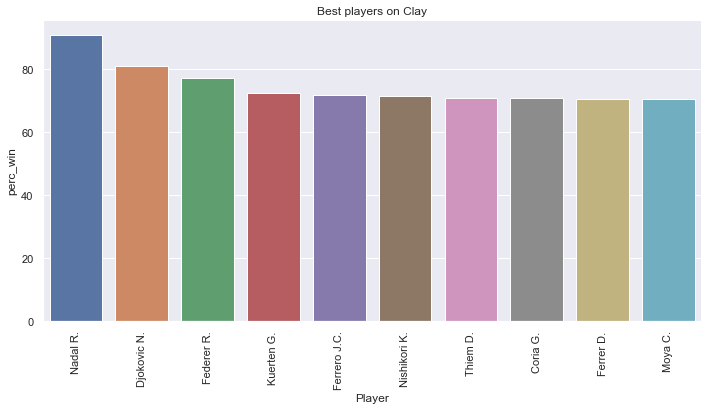

In [153]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Clay.Player,  rotation=90)
plt.title('Best players on Clay')

In [ ]:
# Best player on Grass

top_Grass = surface[surface.Surface == 'Grass'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Grass')

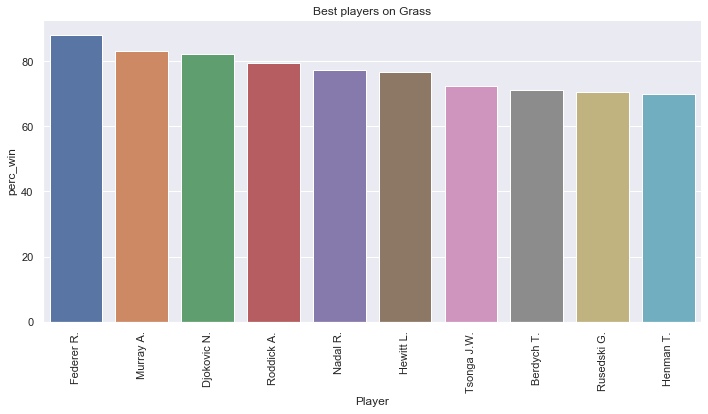

In [72]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Grass, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Grass.Player,  rotation=90)
plt.title('Best players on Grass')

In [ ]:
# top 10 players on Hard surface

top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Hard')

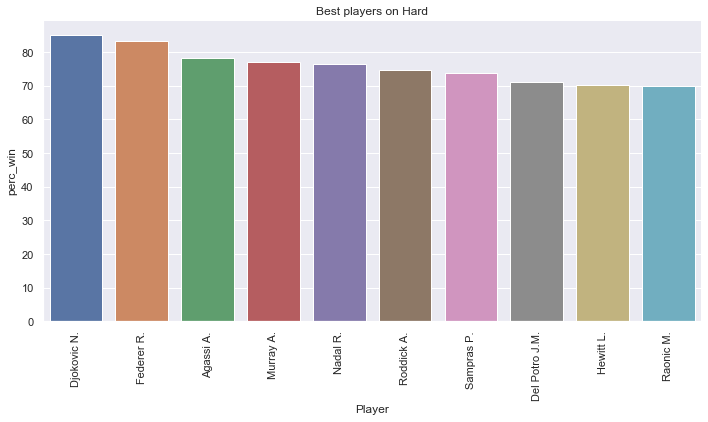

In [73]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=90)
plt.title('Best players on Hard')

In [74]:
# Best percentage overall

career = data[['Winner', 'Loser']]

career_w = data[['Winner']]
career_l = data[['Loser']]
career_w.columns = ['Player']
career_l.columns = ['Player']

career_w['idx'] = range(1, len(career_w) + 1)
career_l['idx'] = range(1, len(career_l) + 1)

career_w = career_w.groupby('Player').count()
career_w = career_w.reset_index()
career_w.columns = ['Player', 'Count_Win']

career_l = career_l.groupby('Player').count()
career_l = career_l.reset_index()
career_l.columns = ['Player', 'Count_Lose']

career = pd.merge(career_w, career_l, on='Player')

career['total_play'] = career['Count_Win'] + career['Count_Lose']
career['perc_win'] = round(career['Count_Win'] / career['total_play'],4)*100

career = career[career.total_play > 500]

career = career.sort_values(by='perc_win', ascending=False).head(20)
career

/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Player,Count_Win,Count_Lose,total_play,perc_win
187,Djokovic N.,710,141,851,83.43
228,Federer R.,1018,218,1236,82.36
542,Nadal R.,779,171,950,82.00
540,Murray A.,566,174,740,76.49
649,Roddick A.,576,197,773,74.51
333,Hewitt L.,514,213,727,70.70
779,Tsonga J.W.,360,169,529,68.05
232,Ferrer D.,651,319,970,67.11
544,Nalbandian D.,357,184,541,65.99
61,Berdych T.,528,277,805,65.59


Text(0.5, 1, 'Best players overall since 2000')

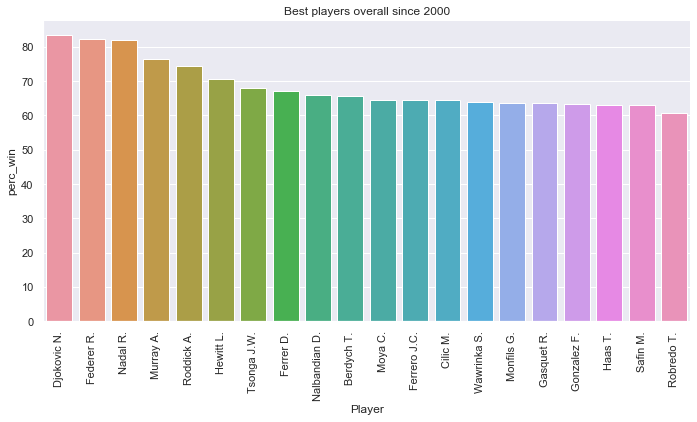

In [75]:
g=sns.catplot(x='Player', y='perc_win', data=career, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = career.Player,  rotation=90)
plt.title('Best players overall since 2000')

Big Three Comparison : Federer vs Nadal vs Djokovic

In [76]:
surface_top3 = surface[(surface.Player.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])) & (surface.Surface != 'Carpet')]
surface_top3

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
351,Clay,Djokovic N.,169,39,208,81.25
381,Clay,Federer R.,203,60,263,77.19
612,Clay,Nadal R.,351,35,386,90.93
944,Grass,Djokovic N.,65,14,79,82.28
969,Grass,Federer R.,147,20,167,88.02
1131,Grass,Nadal R.,58,17,75,77.33
1435,Hard,Djokovic N.,469,82,551,85.12
1468,Hard,Federer R.,622,124,746,83.38
1719,Hard,Nadal R.,363,112,475,76.42


In [77]:
surface_top3 = pd.pivot_table(surface_top3, values='perc_win', columns=['Surface'], index=['Player'])
surface_top3.index.names
# surface_top3.columns = ['Player', 'Clay', 'Grass', 'Hard']

FrozenList(['Player'])

In [78]:
surface_top3[surface_top3.index == "Federer R."]

Surface,Clay,Grass,Hard
Player,,,
Federer R.,77.19,88.02,83.38


In [79]:
# Radar chart for Surface
%matplotlib inline

labels = np.array(['Clay', 'Grass', 'Hard'])
federer = surface_top3.loc[surface_top3[surface_top3.index == "Federer R."].index[0],labels].values

In [80]:
federer = surface_top3.loc[surface_top3[surface_top3.index == "Federer R."].index[0],labels].values
nadal = surface_top3.loc[surface_top3[surface_top3.index == "Nadal R."].index[0],labels].values
djokovic = surface_top3.loc[surface_top3[surface_top3.index == "Djokovic N."].index[0],labels].values

federer = np.concatenate((federer,[federer[0]]))
nadal = np.concatenate((nadal,[nadal[0]]))
djokovic = np.concatenate((djokovic,[djokovic[0]]))

In [81]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
angles=np.concatenate((angles,[angles[0]]))

/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


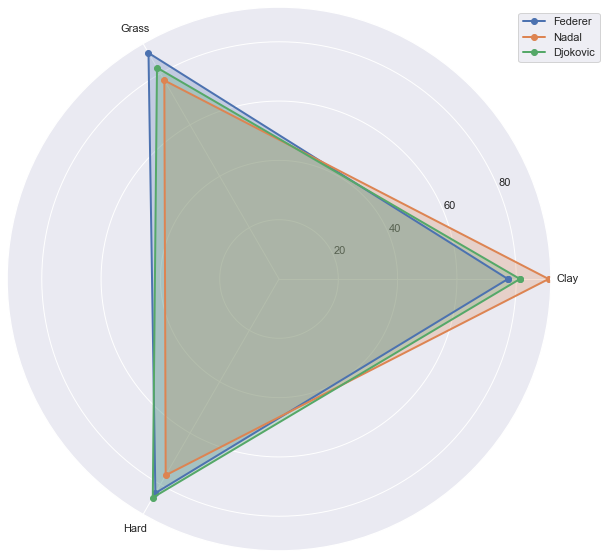

In [82]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, polar=True)
ax1.plot(angles, federer, 'o-', linewidth=2, label = 'Federer')
ax1.fill(angles, federer, alpha=0.25)
ax1.set_thetagrids(angles * 180/np.pi, labels)
ax1.grid(True)

ax2 = fig.add_subplot(111, polar=True)
ax2.plot(angles, nadal, 'o-', linewidth=2, label = 'Nadal')
ax2.fill(angles, nadal, alpha=0.25)
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.grid(True)

ax3 = fig.add_subplot(111, polar=True)
ax3.plot(angles, djokovic, 'o-', linewidth=2, label = 'Djokovic')
ax3.fill(angles, djokovic, alpha=0.25)
ax3.set_thetagrids(angles * 180/np.pi, labels)
ax3.grid(True)

plt.legend(bbox_to_anchor=(1.1,1))